<h3>NFL Game Simulation - Basic Example</h3>

<p>
  <b>Description</b>: Estimate Win Probabilities based on Points For and Points Against from the Regular Season.
</p>

<p>
  <b>Question(s)</b>: Which team has the better chance of winning the game?
</p>

<br />
<br />
<br />

In [1]:
import random

import numpy as np
import pandas as pd
from scipy.stats import norm

In [2]:
year = 2020
playoff_schedule = [
  ## round 1
  ('Tampa Bay Buccaneers', 'Washington Football Team'),
  ('New Orleans Saints', 'Chicago Bears'),
  ('Seattle Seahawks', 'Los Angeles Rams'),

  ## round 2
  ('New Orleans Saints', 'Tampa Bay Buccaneers'),
  ('Green Bay Packers', 'Los Angeles Rams'),

  ## round 3
  ('Green Bay Packers', 'Tampa Bay Buccaneers'),
]

In [3]:
games = pd.read_csv(f'../../data/nfl/pfr-{year}-games.csv', index_col=0)

weeks = [str(i+1) for i in range(19)]
regular_season = games[games.week.isin(weeks)].copy()
ratings = regular_season.groupby('team').mean()[['pf', 'pa']]

uniq_teams_query = np.unique(np.array(playoff_schedule).flatten())
ratings.loc[uniq_teams_query]

,pf,pa
team,,
Chicago Bears,23.2500,23.1250
Green Bay Packers,31.8125,23.0625
Los Angeles Rams,23.2500,18.5000
New Orleans Saints,30.1250,21.0625
Seattle Seahawks,28.6875,23.1875
Tampa Bay Buccaneers,30.7500,22.1875
Washington Football Team,20.9375,20.5625


In [7]:
avg_points = regular_season['pf'].mean()
score_std = regular_season['pf'].std()

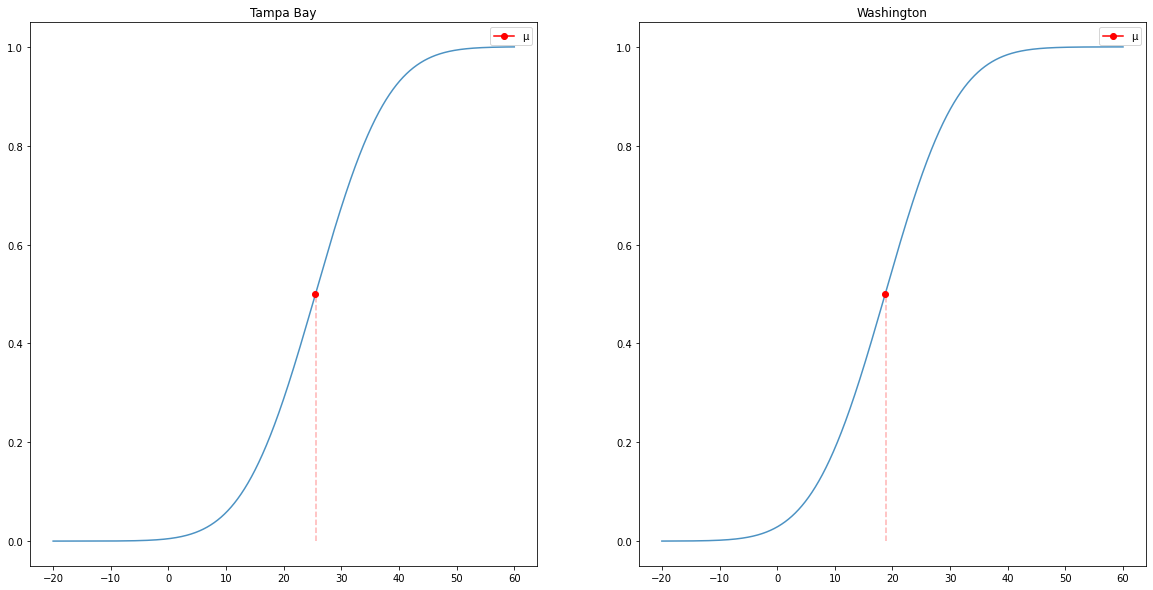

In [79]:
import matplotlib.pyplot as plt

def plot_game_cdfs(t1, t2):

  t1_pf, t1_pa = ratings.loc[t1][['pf', 'pa']]
  t2_pf, t2_pa = ratings.loc[t2][['pf', 'pa']]

  _, ax = plt.subplots(1, 2, figsize=(20, 10))

  x = np.linspace(-20, 60, 10000)
  team1_mu = (t1_pf * t2_pa) / avg_points
  vals_1 = norm.cdf(x, team1_mu, score_std)

  ax[0].set_title('Tampa Bay')
  ax[0].plot(x, vals_1, alpha=.8)
  ax[0].plot(team1_mu, .5, color='red', label='μ', marker='o')
  ax[0].vlines([team1_mu+.1], 0, .5, colors='red', alpha=.3, linestyles='dashed')
  ax[0].legend()

  team2_mu = (t2_pf * t1_pa) / avg_points
  vals_2 = norm.cdf(x, team2_mu, score_std)

  ax[1].set_title('Washington')
  ax[1].plot(x, vals_2, alpha=.8)
  ax[1].plot(team2_mu, .5, color='red', label='μ', marker='o')
  ax[1].vlines([team2_mu+.1], 0, .5, colors='red', alpha=.3, linestyles='dashed')
  ax[1].legend()

  plt.show()

plot_game_cdfs(
  'Tampa Bay Buccaneers',
  'Washington Football Team'
)

In [5]:
avg_points = regular_season['pf'].mean()
score_std = regular_season['pf'].std()

def play_game(t1, t2):

  t1_pf, t1_pa = ratings.loc[t1][['pf', 'pa']]
  t2_pf, t2_pa = ratings.loc[t2][['pf', 'pa']]

  team1_mu = (t1_pf * t2_pa) / avg_points
  team2_mu = (t2_pf * t1_pa) / avg_points

  return (
    round(norm.ppf(random.random(), team1_mu, score_std), 2),
    round(norm.ppf(random.random(), team2_mu, score_std), 2),
  )

simulations = 10000

print('-' * 100)

for team1, team2 in playoff_schedule:

  scores = [
    play_game(team1, team2)
    for _ in range(simulations)
  ]

  t1_wins = sum(score[0] > score[1] for score in scores)

  t1_win_percentage = t1_wins / simulations
  t2_win_percentage = 1 - t1_win_percentage

  print(f'{team1}: {round(t1_win_percentage * 100, 2)}')
  print(f'{team2}: {round(t2_win_percentage * 100, 2)}')
  print('-' * 100)

----------------------------------------------------------------------------------------------------
Tampa Bay Buccaneers: 68.23
Washington Football Team: 31.77
----------------------------------------------------------------------------------------------------
New Orleans Saints: 72.57
Chicago Bears: 27.43
----------------------------------------------------------------------------------------------------
Seattle Seahawks: 49.08
Los Angeles Rams: 50.92
----------------------------------------------------------------------------------------------------
New Orleans Saints: 52.43
Tampa Bay Buccaneers: 47.57
----------------------------------------------------------------------------------------------------
Green Bay Packers: 56.47
Los Angeles Rams: 43.53
----------------------------------------------------------------------------------------------------
Green Bay Packers: 50.06
Tampa Bay Buccaneers: 49.94
-----------------------------------------------------------------------------------